# Pandas Basics Part 3 — Workbook

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

Yet transforming complex social constructs like gender into quantifiable data is tricky and historically fraught. They claim, in fact, that one of the [most frequently asked questions](https://medium.com/@matthew_daniels/faq-for-the-film-dialogue-by-gender-project-40078209f751) about the piece is about gender: “Wait, but let’s talk about gender. How do you know the monster in Monsters Inc. is a boy!" The short answer is that they don't. To determine character gender, they used actors' IMDB information, which they acknowledge is an imperfect approach: "Sometimes, women voice male characters. Bart Simpson, for example, is voiced by a woman. We’re aware that this means some of the data is wrong, AND we’re still fine with the methodology and approach."

As we work with this data, we want to be critical and cognizant of this approach to gender. How does such a binary understanding of gender, gleaned from the IMDB pages of actors, influence our later results and conclusions? What do we gain by using such an approach, and what do we lose? How else might we have encoded or determined gender for the same data? 

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [105]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [106]:
pd.options.display.max_rows = 200

## Get Data

In [122]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [ ]:
film_df.sample(10)

## Rename Columns

In [67]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [68]:
film_df.head()

script_id        character  words gender   age    imdb_id  \
0        280            betty    311      f  35.0  tt0112579   
1        280  carolyn johnson    873      f   NaN  tt0112579   
2        280          eleanor    138      f   NaN  tt0112579   
3        280  francesca johns   2251      f  46.0  tt0112579   
4        280            madge    190      f  46.0  tt0112579   

                           title  release_year  gross  proportion_of_dialogue  
0  The Bridges of Madison County          1995  142.0                0.048639  
1  The Bridges of Madison County          1995  142.0                0.136534  
2  The Bridges of Madison County          1995  142.0                0.021583  
3  The Bridges of Madison County          1995  142.0                0.352049  
4  The Bridges of Madison County          1995  142.0                0.029715

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [143]:
women_filter = film_df['gender'] == 'woman'

In [144]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [140]:
men_filter = film_df['gender'] == 'man'

In [141]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [385]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this groupby to a new variable `women_by_film`

In [362]:
women_by_film = women_film_df.groupby('title')['words'].sum()

Using the same construction, make a new another new variable `men_by_film`

In [387]:
men_by_film = men_film_df.groupby('title')['words'].sum()

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [364]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [435]:
top20_women = women_by_film.sort_values(ascending=False)[:20]

Using the same construction, make a new variable `top20_men`

In [436]:
top20_men = men_by_film.sort_values(ascending=False)[:20]

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title.

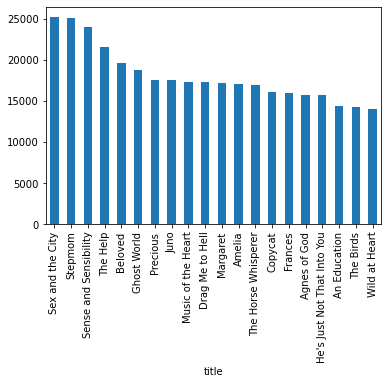

In [523]:
top20_women.plot(kind='bar')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

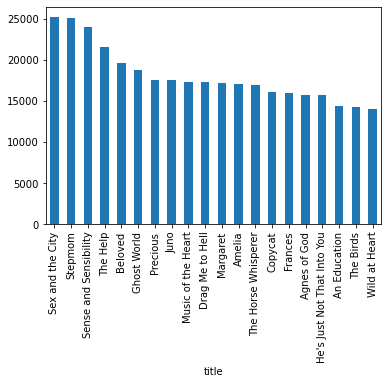

In [524]:
ax = top20_women.plot(kind='bar')
ax.figure.savefig('top20_women.png')

Sometimes parts of the chart will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plot.tight_layout()`, which will adjust the plot before you save it.

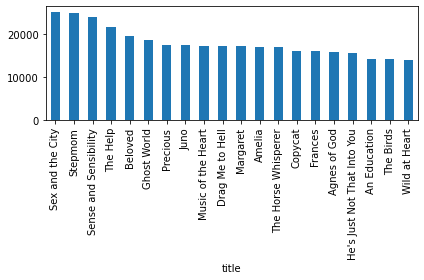

In [533]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

Now make and save a bar plot of the top 20 movies that have the most number of works spoken by men. Give it a title, and make the bars a different color. 

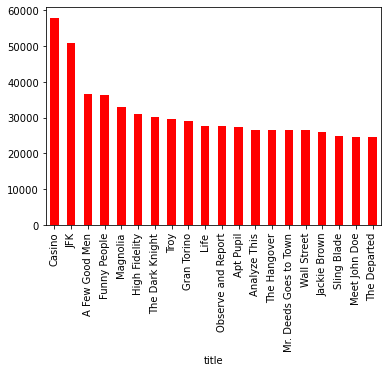

In [404]:
top20_men.plot( kind='bar', color='red', label='Men')

In [483]:
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
The Departed              24518
Name: words, dtype: int64

In [ ]:
ax = top20_men.plot( kind='bar', color='purple', label='Men', legend=True)
top20_women.plot(ax=ax, kind='bar', color='red', label='Women', legend=True)

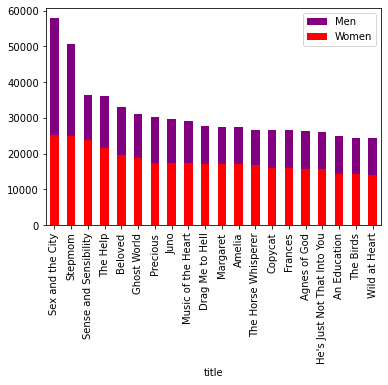

In [488]:
ax = top20_men.plot( kind='bar', color='purple', label='Men', legend=True)
top20_women.plot(ax=ax, kind='bar', color='red', label='Women', legend=True)

In [486]:
combined_df = pd.DataFrame({"top20_women": top20_women, "top20_men": top20_men})

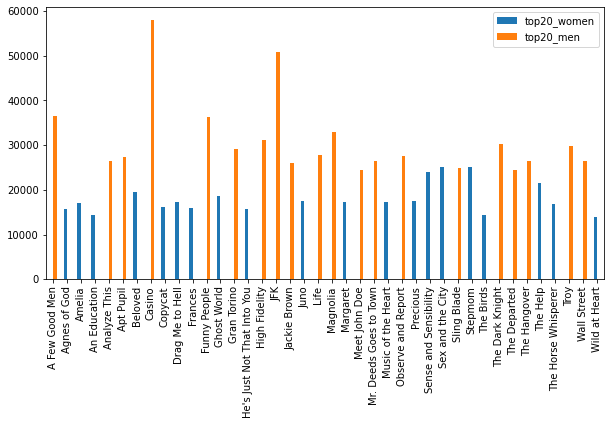

In [504]:
combined_df.plot(kind='bar', figsize=(10,5))

In [506]:
combined_df

top20_women  top20_men
A Few Good Men                       NaN    36484.0
Agnes of God                     15732.0        NaN
Amelia                           17014.0        NaN
An Education                     14330.0        NaN
Analyze This                         NaN    26548.0
Apt Pupil                            NaN    27428.0
Beloved                          19594.0        NaN
Casino                               NaN    57944.0
Copycat                          16078.0        NaN
Drag Me to Hell                  17236.0        NaN
Frances                          15978.0        NaN
Funny People                         NaN    36278.0
Ghost World                      18692.0        NaN
Gran Torino                          NaN    29092.0
He's Just Not That Into You      15708.0        NaN
High Fidelity                        NaN    31114.0
JFK                                  NaN    50752.0
Jackie Brown                         NaN    25984.0
Juno                             17534.0        NaN
Life                                 NaN    27748.0
Magnolia                             NaN    33024.0
Margaret                         17229.0        NaN
Meet John Doe                        NaN    24520.0
Mr. Deeds Goes to Town               NaN    26508.0
Music of the Heart               17274.0        NaN
Observe and Report                   NaN    27534.0
Precious                         17536.0        NaN
Sense and Sensibility            23922.0        NaN
Sex and the City                 25184.0        NaN
Sling Blade                          NaN    24964.0
Stepmom                          25014.0        NaN
The Birds                        14284.0        NaN
The Dark Knight                      NaN    30290.0
The Departed                         NaN    24518.0
The Hangover                         NaN    26538.0
The Help                         21540.0        NaN
The Horse Whisperer              16920.0        NaN
Troy                                 NaN    29712.0
Wall Street                          NaN    26440.0
Wild at Heart                    14014.0        NaN

In [505]:
combined_df.sort_values(by='words').plot(kind='bar', figsize=(10,5))

KeyError: 'words'

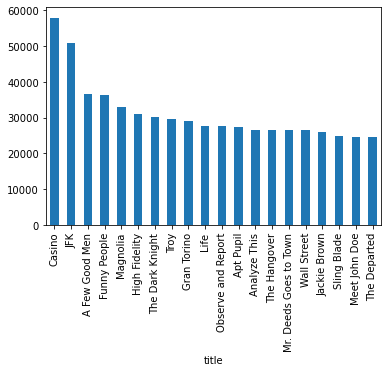

In [361]:
men_film_df.groupby('title')['words'].sum().sort_values(ascending=False)[:20].plot(kind='bar')

## Reset Index

In [370]:
women_by_film.reset_index()

title  words
0           (500) Days of Summer   5738
1     10 Things I Hate About You   8992
2               12 Years a Slave   3452
3                 12 and Holding   5324
4                      127 Hours    809
...                          ...    ...
1935                 Zero Effect   2216
1936                  Zerophilia   4612
1937                      Zodiac   1421
1938                    eXistenZ   3752
1939                         xXx    998

[1940 rows x 2 columns]

In [367]:
top20_women.sort_values(by='words', ascending=False)[:20].plot(kind='bar')

TypeError: sort_values() got an unexpected keyword argument 'by'

In [355]:
top20_women

title  words
1227             Sex and the City  25184
1337                      Stepmom  25014
1219        Sense and Sensibility  23922
1557                     The Help  21540
189                       Beloved  19594
572                   Ghost World  18692
1097                     Precious  17536
778                          Juno  17534
968            Music of the Heart  17274
433               Drag Me to Hell  17236
891                      Margaret  17229
83                         Amelia  17014
1561          The Horse Whisperer  16920
352                       Copycat  16078
530                       Frances  15978
61                   Agnes of God  15732
640   He's Just Not That Into You  15708
102                  An Education  14330
1427                    The Birds  14284
1905                Wild at Heart  14014

In [179]:
film_filter = film_df['title'] == 'Pick a film here!'

In [180]:
film_df[film_filter]

title  release_year        character gender  words  \
13937  Mean Girls          2004    Aaron Samuels    man    426   
13938  Mean Girls          2004       Cady Heron  woman   2798   
13939  Mean Girls          2004           Damian    man    624   
13940  Mean Girls          2004  Gretchen Wiener  woman    609   
13941  Mean Girls          2004        Janis Ian  woman    907   
13942  Mean Girls          2004      Karen Smith  woman    301   
13943  Mean Girls          2004       Mr. Duvall    man    365   
13944  Mean Girls          2004      Mrs. George  woman    125   
13945  Mean Girls          2004      Ms. Norbury  woman    720   
13946  Mean Girls          2004    Regina George  woman   1030   

       proportion_of_dialogue   age  gross  script_id  
13937                0.053890  23.0  120.0       4605  
13938                0.353953  18.0  120.0       4605  
13939                0.078937  26.0  120.0       4605  
13940                0.077040  22.0  120.0       4605  
13941                0.114738  22.0  120.0       4605  
13942                0.038077  19.0  120.0       4605  
13943                0.046173  43.0  120.0       4605  
13944                0.015813  33.0  120.0       4605  
13945                0.091082  34.0  120.0       4605  
13946                0.130297  26.0  120.0       4605

In [338]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

In [337]:
film_df['words'] / film_df.groupby('title')['words'].sum()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
               ..
Zero Effect   NaN
Zerophilia    NaN
Zodiac        NaN
eXistenZ      NaN
xXx           NaN
Name: words, Length: 25041, dtype: float64

In [ ]:
men_film_df.groupby('title')['words'].sum().sort_values(ascending=False)[:20]

We can use the `.groupby()` function to group all the women characters in each film and sum up their total dialogue.

By adding a Python string slice, we can identify the top 20 films with the greatest proportion of women speaking.

```{margin} Line Breaks
If a line of code gets too long, you can create a line break with a backslash `\`
```

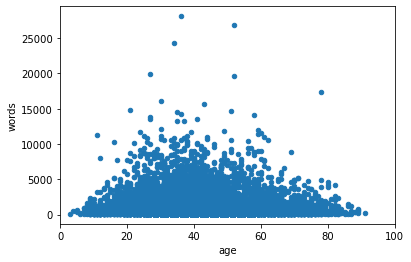

In [282]:
men_film_df.plot(x='age', y='words', kind='scatter', xlim=(0,100))

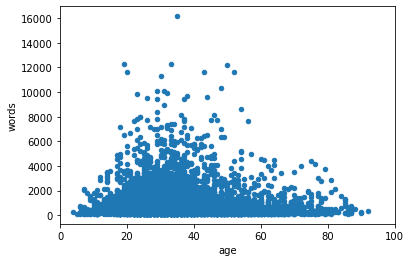

In [284]:
women_film_df.plot(x='age', y='words', kind='scatter', xlim=(0,100))

In [305]:
film_df.groupby(['title', 'release_year'])['gross', 'words', 'proportion_of_dialogue'].sum().reset_index()

/Users/melaniewalsh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


title  release_year   gross  words  \
0           (500) Days of Summer          2009   481.0  18500   
1     10 Things I Hate About You          1999   780.0  19680   
2               12 Years a Slave          2013  1680.0  19628   
3                 12 and Holding          2005     0.0  15968   
4                      127 Hours          2010    80.0   5145   
...                          ...           ...     ...    ...   
1995                 Zero Effect          1998    21.0  13927   
1996                  Zerophilia          2005     0.0  16686   
1997                      Zodiac          2007  1271.0  14656   
1998                    eXistenZ          1999    36.0   9447   
1999                         xXx          2002  1899.0   8285   

      proportion_of_dialogue  
0                        1.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        1.0  
...                      ...  
1995                     1.0  
1996                     1.0  
1997                     1.0  
1998                     1.0  
1999                     1.0  

[2000 rows x 5 columns]

In [534]:
films_by_year = film_df.groupby(['title', 'release_year'])[['gross', 'words', 'proportion_of_dialogue']].sum().reset_index()

In [535]:
films_by_year

title  release_year   gross  words  \
0           (500) Days of Summer          2009   481.0  18500   
1     10 Things I Hate About You          1999   780.0  19680   
2               12 Years a Slave          2013  1680.0  19628   
3                 12 and Holding          2005     0.0  15968   
4                      127 Hours          2010    80.0   5145   
...                          ...           ...     ...    ...   
1995                 Zero Effect          1998    21.0  13927   
1996                  Zerophilia          2005     0.0  16686   
1997                      Zodiac          2007  1271.0  14656   
1998                    eXistenZ          1999    36.0   9447   
1999                         xXx          2002  1899.0   8285   

      proportion_of_dialogue  
0                        1.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        1.0  
...                      ...  
1995                     1.0  
1996                     1.0  
1997                     1.0  
1998                     1.0  
1999                     1.0  

[2000 rows x 5 columns]

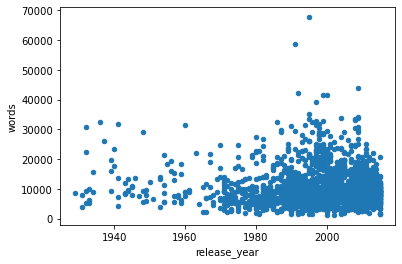

In [532]:
films_by_year.plot(x='release_year', y='words', kind='scatter')

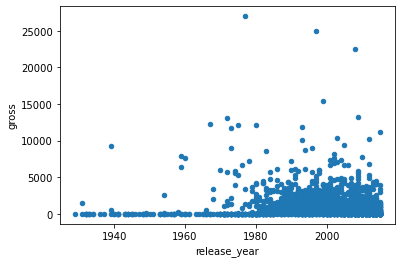

In [329]:
films_by_year.plot(x='release_year', y='gross', kind='scatter')

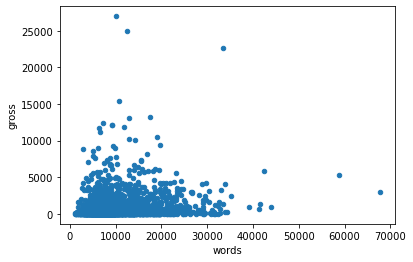

In [536]:
films_by_year.plot(x='gross', y='words', kind='scatter')

In [ ]:
!pip install altair

In [ ]:
import altair as alt

In [310]:
alt.Chart(films_by_year).mark_circle(size=50).encode(
    x= 'gross',
    y='words',
    tooltip= ['title', 'release_year', 'gross'],
).interactive()

alt.Chart(...)

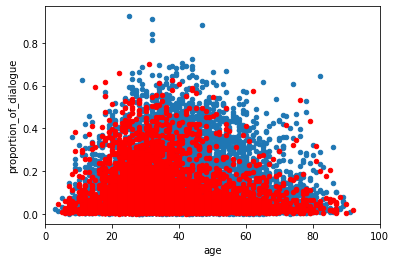

In [294]:
ax = men_film_df.plot(x='age', y='proportion_of_dialogue', kind='scatter',xlim=(0,100))
women_film_df.plot(ax=ax, x='age', y='proportion_of_dialogue', kind='scatter',  color='red', xlim=(0,100))

## Plots and Data Visualizations

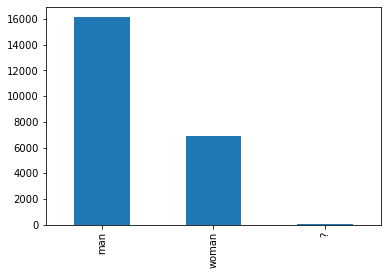

In [312]:
film_df['gender'].value_counts().plot(kind='bar')

In [314]:
film_df

title  release_year        character gender  \
0      The Bridges of Madison County          1995            Betty  woman   
1      The Bridges of Madison County          1995  Carolyn Johnson  woman   
2      The Bridges of Madison County          1995          Eleanor  woman   
3      The Bridges of Madison County          1995  Francesca Johns  woman   
4      The Bridges of Madison County          1995            Madge  woman   
...                              ...           ...              ...    ...   
23042           Beauty and the Beast          1991          Lumiere    man   
23043           Beauty and the Beast          1991          Maurice    man   
23044           Beauty and the Beast          1991  Monsieur D'Arqu    man   
23045           Beauty and the Beast          1991       Mrs. Potts  woman   
23046           Beauty and the Beast          1991         Wardrobe  woman   

       words  proportion_of_dialogue   age  gross  script_id  
0        311                0.048639  35.0  142.0        280  
1        873                0.136534   NaN  142.0        280  
2        138                0.021583   NaN  142.0        280  
3       2251                0.352049  46.0  142.0        280  
4        190                0.029715  46.0  142.0        280  
...      ...                     ...   ...    ...        ...  
23042   1063                0.104636  56.0  452.0       9254  
23043   1107                0.108967  71.0  452.0       9254  
23044    114                0.011222  58.0  452.0       9254  
23045    564                0.055517  66.0  452.0       9254  
23046    121                0.011911  54.0  452.0       9254  

[23047 rows x 9 columns]

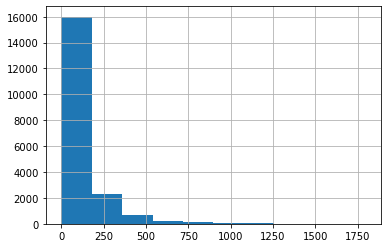

In [315]:
film_df.hist()

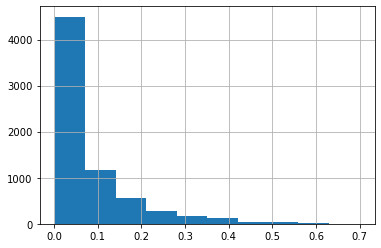

In [204]:
women_film_df['proportion_of_dialogue'].sort

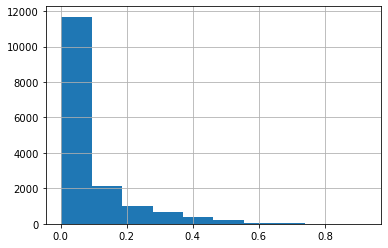

In [205]:
men_film_df['proportion_of_dialogue'].hist()

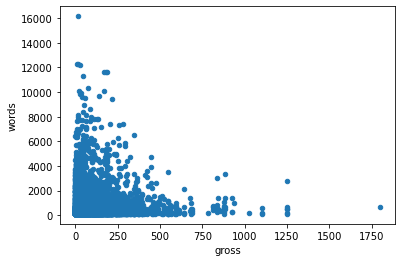

In [197]:
women_film_df.plot(x='gross', y='words', kind='scatter')

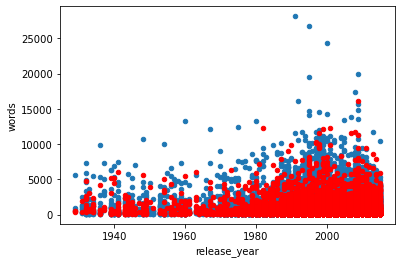

In [207]:
ax = men_film_df.plot(x='release_year', y='words', kind='scatter',)
women_film_df.plot(ax=ax, x='release_year', y='words', kind='scatter',  color='red')

In [257]:
import altair as alt

In [212]:
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [248]:
women_film_df.groupby(['title', 'release_year'])['proportion_of_dialogue'].sum().reset_index()

title  release_year  proportion_of_dialogue
0           (500) Days of Summer          2009                0.310162
1     10 Things I Hate About You          1999                0.456911
2               12 Years a Slave          2013                0.175871
3                 12 and Holding          2005                0.333417
4                      127 Hours          2010                0.157240
...                          ...           ...                     ...
1941                 Zero Effect          1998                0.159115
1942                  Zerophilia          2005                0.276399
1943                      Zodiac          2007                0.096957
1944                    eXistenZ          1999                0.397163
1945                         xXx          2002                0.120459

[1946 rows x 3 columns]

In [249]:
women_by_title = women_film_df.groupby(['title', 'release_year'])['proportion_of_dialogue'].sum().reset_index()

In [265]:
x = alt.X('release_year', scale=alt.Scale(domain=(1920, 2020)))

alt.Chart(women_by_title, title='Proportion of Dialogue Spoken by Women').mark_circle(size=50).encode(
    x= 'release_year',
    y='proportion_of_dialogue',
    color='proportion_of_dialogue',
    tooltip= ['title', 'release_year', 'proportion_of_dialogue'],
    
).interactive()

alt.Chart(...)

In [254]:
x = alt.X('release_year', scale=alt.Scale(domain=(1920, 2000)))
alt.Chart(film_df).mark_circle(size=50).encode(
   x = x,
    y='words',
    color='gender',
    tooltip= ['title','character']).interactive()

alt.Chart(...)

In [96]:
women_film_df.groupby('title')[['proportion_of_dialogue']]\
.sum().sort_values(by='proportion_of_dialogue', ascending=False)[:20]

proportion_of_dialogue
title                                                 
The Descent                                   1.000000
Now and Then                                  1.000000
Precious                                      0.993541
Martyrs                                       0.965550
The Hand That Rocks the Cradle                0.933750
Agnes of God                                  0.922482
Heavenly Creatures                            0.919368
The Help                                      0.916947
3 Women                                       0.899530
The Watermelon Woman                          0.894676
Grandma                                       0.894137
The Craft                                     0.891866
Easy A                                        0.888131
The Others                                    0.879972
Black Christmas                               0.877467
Wadjda                                        0.870567
For Colored Girls                             0.870247
The Roommate                                  0.869879
Mrs. Winterbourne                             0.864730
Practical Magic                               0.856693

## Drop Columns 

In [69]:
film_df = film_df.drop(columns='imdb_id')

**Missing Data**

**.isna() / .notna()**

Pandas has special ways of dealing with missing data. As you may have already noticed, blank rows in a CSV file show up as `NaN` in a Pandas DataFrame.

To filter and count the number of missing/not missing values in a dataset, we can use the special `.isna()` and `.notna()` methods on a DataFrame or Series object. 

The `.isna()` and `.notna()` methods return True/False pairs for each row, which we can use to filter the DataFrame for any rows that have information in a given column. 

In [70]:
film_df[film_df['character'].isna()]

script_id character  words gender  age           title  release_year  \
4656        1807       NaN    146      f  NaN         Beloved          1998   
19448       7445       NaN    520      f  NaN  House of Games          1987   

       gross  proportion_of_dialogue  
4656    42.0                0.005162  
19448    5.0                0.165184

This is important information for the sake of better understanding our dataset. But it's also important because `NaN` values are treated as *floats*, not *strings*. If we tried to manipulate this column as text data, we would get an error. For this reason, we're going to replace or "fill" these `NaN` values with the string "No Character Data" by using the `.fillna()` method.

In [71]:
film_df['character'] = film_df['character'].fillna('No Character Data')

In [72]:
film_df[film_df['character'].isna()]

Empty DataFrame
Columns: [script_id, character, words, gender, age, title, release_year, gross, proportion_of_dialogue]
Index: []

## Check for Duplicates 

### Duplicates

We can check for duplicate rows by using the `.duplicated()` method and setting the parameter `keep=False`, which will display all the duplicated values in the dataset — rather than just the first duplicated value `keep='first'` or the last duplicated value `keep='last'`.

In [73]:
film_df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
23047    False
23048    False
23049     True
23050    False
23051     True
Length: 23051, dtype: bool

The output above is reporting whether each row in the dataset is a duplicate. We can use the `.duplicated()` method inside a filter to isolate only the rows in the dataframe that are exact duplicates.

In [74]:
film_df[film_df.duplicated(keep=False)]

script_id      character  words gender   age  \
21001       8099          c-3po    138      m  69.0   
21002       8099          c-3po    138      m  69.0   
21963       8560  kilgore trout   2673      m  63.0   
21964       8560  kilgore trout   2673      m  63.0   
22935       9222   groomsman #5    238      m   NaN   
22936       9222   groomsman #5    238      m   NaN   
23049       9254     mrs. potts    564      f  66.0   
23051       9254     mrs. potts    564      f  66.0   

                                            title  release_year  gross  \
21001  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21002  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21963                      Breakfast of Champions          1999    NaN   
21964                      Breakfast of Champions          1999    NaN   
22935                            Wedding Crashers          2005  283.0   
22936                            Wedding Crashers          2005  283.0   
23049                        Beauty and the Beast          1991  452.0   
23051                        Beauty and the Beast          1991  452.0   

       proportion_of_dialogue  
21001                0.020702  
21002                0.020702  
21963                0.197211  
21964                0.197211  
22935                0.012032  
22936                0.012032  
23049                0.055517  
23051                0.055517

We can drop duplicates from the DataFrame with the `.drop_duplicates()` method and choose to keep the first instance of the duplicate or the last instance.

In [75]:
film_df = film_df.drop_duplicates(keep='first')

Now if we check the data for duplicates again, they should be all gone.

In [76]:
film_df[film_df.duplicated(keep=False)]

Empty DataFrame
Columns: [script_id, character, words, gender, age, title, release_year, gross, proportion_of_dialogue]
Index: []

## Clean and Transform Data

### Pandas `.str` Methods

Remember all the special things that you can do with Python strings aka [string methods](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Python/String-Methods.html)?

Pandas has special [Pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods), too. Many of them are very similar to Python string methods, except they will transform every single string value in a column, and we have to add `.str` to the method chain.

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.str.lower()`         | makes the string in each row lowercase                                                                                |
| df['column_name']`.str.upper()`         | makes the string in each row uppercase                                                |
| df['column_name']`.str.title()`         | makes the string in each row titlecase                                                |
| df['column_name']`.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| df['column_name']`.str.contains('some string')`      | tests whether string in each row contains "some string" |
| df['column_name']`.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| df['column_name']`.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                        |
                                                            

For example, to transform every character's name in the "character" column from lowercase to uppercase, we can use `.str.upper()` 

In [77]:
film_df['character'].str.upper()

0                  BETTY
1        CAROLYN JOHNSON
2                ELEANOR
3        FRANCESCA JOHNS
4                  MADGE
              ...       
23046            LUMIERE
23047            MAURICE
23048    MONSIEUR D'ARQU
23049         MRS. POTTS
23050           WARDROBE
Name: character, Length: 23047, dtype: object

To transform every character's name in the "character" column to lowercase, we can use `.str.lower()`

In [78]:
film_df['character'].str.lower()

0                  betty
1        carolyn johnson
2                eleanor
3        francesca johns
4                  madge
              ...       
23046            lumiere
23047            maurice
23048    monsieur d'arqu
23049         mrs. potts
23050           wardrobe
Name: character, Length: 23047, dtype: object

If we want to replace the gender columns's single letter abbreviation for "male" / "female" (sex) with "man" / "woman" (gender identity), we could use the `.str.replace()` method. 

In [79]:
film_df['gender'] = film_df['gender'].str.replace('m', 'man')

In [80]:
film_df['gender'] = film_df['gender'].str.replace('f', 'woman')

In [81]:
film_df.sample(10)

script_id        character  words gender   age  \
19487       7454      det. glover    154    man  39.0   
9575        3087  young man in li    166    man   NaN   
15365       5147  dan campbell, t    281    man  49.0   
3462        1466  novello, nightc    105    man  44.0   
936          855    shimon haretz    865    man  58.0   
711          808   jerry thompson    739    man  25.0   
15751       5306     mr woodhouse    402    man  64.0   
19944       7698       Aunt Voula    480  woman   NaN   
11737       3763    birdie conrad    510  woman  75.0   
18232       6845           lenore    738  woman  44.0   

                              title  release_year  gross  \
19487                       Serpico          1973    NaN   
9575                   Philadelphia          1993  162.0   
15365  Transatlantic Merry-Go-Round          1934    NaN   
3462                White Christmas          1954    NaN   
936                        Defiance          2008   34.0   
711                    Citizen Kane          1941    NaN   
15751                          Emma          1996   43.0   
19944      My Big Fat Greek Wedding          2002  360.0   
11737               You've Got Mail          1998  215.0   
18232                         Taken          2008  175.0   

       proportion_of_dialogue  
19487                0.020819  
9575                 0.012131  
15365                0.031330  
3462                 0.018607  
936                  0.079003  
711                  0.053993  
15751                0.034187  
19944                0.060484  
11737                0.019103  
18232                0.103231

We can use the `.str.contains()` to search for particular words or phrases in a column, such as "Star Wars."

In [82]:
film_df[film_df['title'].str.contains('Star Wars')]

script_id        character  words gender   age  \
3017        1359   admiral ackbar    199    man  61.0   
3018        1359  ben 'obi-wan' k    462    man  69.0   
3019        1359            c-3po    881    man  37.0   
3020        1359      darth vader    381    man  48.0   
3021        1359         han solo    835    man  41.0   
3022        1359  lando calrissia    379    man  46.0   
3023        1359   luke skywalker    915    man  32.0   
3024        1359    princess leia    359  woman  27.0   
3025        1359      the emperor    516    man  39.0   
3026        1359             yoda    163    man  19.0   
3027        1360  anakin skywalke   2061    man  21.0   
3028        1360      cliegg lars    152    man  62.0   
3029        1360      count dooku    321    man  80.0   
3030        1360  dexter jettster    151    man  67.0   
3031        1360    jar jar binks    294    man  29.0   
3032        1360          lama su    350    man  48.0   
3033        1360       mace windu    365    man  54.0   
3034        1360  madame jocasta     331  woman  82.0   
3035        1360   obi-wan kenobi   1477    man  31.0   
3036        1360            padme    668  woman  21.0   
3037        1360   queen jamillia    135  woman  25.0   
3038        1360  supreme chancel    576    man  58.0   
3039        1360          taun we    139  woman  40.0   
3040        1360            watto    140    man  49.0   
3041        1360             yoda    355    man  58.0   
3058        1362  ben obi-wan ken    995    man  63.0   
3059        1362            c-3po   1506    man  31.0   
3060        1362  cmdr. praji (im    117    man  42.0   
3061        1362      darth vader    492    man  46.0   
3062        1362  general dodonna    185    man  66.0   
3063        1362  grand moff tark    411    man  64.0   
3064        1362           greedo    103    man  33.0   
3065        1362         han solo   1730    man  35.0   
3066        1362            jabba    185    man   NaN   
3067        1362   luke skywalker   2485    man  26.0   
3068        1362  princess leia o    636  woman  21.0   
3069        1362       red leader    241    man  37.0   
3070        1362  red three (bigg    523    man  38.0   
3071        1362     stormtrooper    122    man  36.0   
3072        1362       uncle owen    311    man  61.0   
10591       3427  anakin skywalke   3768    man  24.0   
10592       3427            c-3po    312    man  59.0   
10593       3427  Clone Jedi Knig    104    man   NaN   
10594       3427    darth sldious    244    man   NaN   
10595       3427  general grievou    317    man  33.0   
10596       3427  Ki-Adi-Mundi /     107    man  40.0   
10597       3427       Mace Windu    407    man  57.0   
10598       3427       mon mothma    127  woman  28.0   
10599       3427   obi-wan kenobi   3181    man  34.0   
10600       3427            Padme   1561  woman  24.0   
10601       3427  senator bail or    479    man  50.0   
10602       3427  Supreme Chancel   2367    man  61.0   
10603       3427             yoda    923    man  61.0   
10604       3433    admiral piett    232    man  43.0   
10605       3433  ben (obi-wan) k    177    man  66.0   
10606       3433            C-3PO   1474    man  34.0   
10607       3433    captain needa    108    man  42.0   
10608       3433      darth vader    853    man  49.0   
10609       3433    general veers    114    man  45.0   
10610       3433         han solo   2024    man  38.0   
10611       3433  lando calrissia    798    man  43.0   
10612       3433   luke skywalker   1282    man  29.0   
10613       3433    princess leia   1025  woman  24.0   
10614       3433  rebel force gen    168    man  50.0   
10615       3433    snow creature    227    man   NaN   
10616       3433             yoda    751    man  36.0   
10617       3437  anakin skywalke   1697    man  10.0   
10618       3437        boss nass    209    man  63.0   
10619       3437   Captain Panaka    390    man  45.0   
10620       3437 

We can use the `.str.contains()` to search for particular words or phrases in a column, such as "Mean Girls."

In [83]:
film_df[film_df['title'].str.contains('Mean Girls')]

script_id        character  words gender   age       title  \
13938       4605    aaron samuels    426    man  23.0  Mean Girls   
13939       4605       cady heron   2798  woman  18.0  Mean Girls   
13940       4605           damian    624    man  26.0  Mean Girls   
13941       4605  gretchen wiener    609  woman  22.0  Mean Girls   
13942       4605        janis ian    907  woman  22.0  Mean Girls   
13943       4605      karen smith    301  woman  19.0  Mean Girls   
13944       4605       mr. duvall    365    man  43.0  Mean Girls   
13945       4605      mrs. george    125  woman  33.0  Mean Girls   
13946       4605      ms. norbury    720  woman  34.0  Mean Girls   
13947       4605    regina george   1030  woman  26.0  Mean Girls   

       release_year  gross  proportion_of_dialogue  
13938          2004  120.0                0.053890  
13939          2004  120.0                0.353953  
13940          2004  120.0                0.078937  
13941          2004  120.0                0.077040  
13942          2004  120.0                0.114738  
13943          2004  120.0                0.038077  
13944          2004  120.0                0.046173  
13945          2004  120.0                0.015813  
13946          2004  120.0                0.091082  
13947          2004  120.0                0.130297

## Applying Functions

With the `.apply()` method, we can run a function on every single row in a Pandas column or dataframe.

In [84]:
def make_text_title_case(text):
    title_case_text = text.title()
    return title_case_text

In [85]:
make_text_title_case("betty")

'Betty'

In [86]:
film_df['character'].apply(make_text_title_case)

0                  Betty
1        Carolyn Johnson
2                Eleanor
3        Francesca Johns
4                  Madge
              ...       
23046            Lumiere
23047            Maurice
23048    Monsieur D'Arqu
23049         Mrs. Potts
23050           Wardrobe
Name: character, Length: 23047, dtype: object

In [87]:
film_df['character'] = film_df['character'].apply(make_text_title_case)

In [88]:
film_df.sample(10)

script_id        character  words gender   age  \
7519        2566         Fishlegs    523    man  21.0   
1826        1080  Pierce Patchett    378    man  48.0   
18058       6709              Ken    199    man  59.0   
8942        2930     Paul Sheldon   2438    man  50.0   
14057       4647             Paco    441    man  54.0   
21953       8560  Bonnie Macmahon    155  woman  29.0   
2192        1169        Detective   2411    man   NaN   
19007       7247     Dr Fredricks    393    man   NaN   
3948        1628   Sydney Prosser   1783  woman  39.0   
17333       6271  Marybeth Elliot    155  woman  59.0   

                          title  release_year  gross  proportion_of_dialogue  
7519   How to Train Your Dragon          2010  239.0                0.031140  
1826          L.A. Confidential          1997  122.0                0.039844  
18058      Deconstructing Harry          1997   20.0                0.073895  
8942                     Misery          1990  126.0                0.245173  
14057          Mother and Child          2009    1.0                0.045704  
21953    Breakfast of Champions          1999    NaN                0.011436  
2192                 Mr. Brooks          2007   36.0                0.238053  
19007         The Good Shepherd          2006   79.0                0.039331  
3948            American Hustle          2013  160.0                0.081237  
17333                 Gone Girl          2014  178.0                0.013770

**Filter DataFrame**

We can filter the DataFrames for only characters who are men or women.

In [92]:
men_film_df = film_df[film_df['gender'] == 'man']

In [93]:
women_film_df = film_df[film_df['gender'] == 'woman']

In [94]:
women_film_df

script_id        character  words gender   age  \
0            280            Betty    311  woman  35.0   
1            280  Carolyn Johnson    873  woman   NaN   
2            280          Eleanor    138  woman   NaN   
3            280  Francesca Johns   2251  woman  46.0   
4            280            Madge    190  woman  46.0   
...          ...              ...    ...    ...   ...   
23031       9253     Girl In Pool    118  woman   NaN   
23037       9253    Owen'S Mother    286  woman  39.0   
23041       9254            Belle   2183  woman  35.0   
23049       9254       Mrs. Potts    564  woman  66.0   
23050       9254         Wardrobe    121  woman  54.0   

                               title  release_year  gross  \
0      The Bridges of Madison County          1995  142.0   
1      The Bridges of Madison County          1995  142.0   
2      The Bridges of Madison County          1995  142.0   
3      The Bridges of Madison County          1995  142.0   
4      The Bridges of Madison County          1995  142.0   
...                              ...           ...    ...   
23031                      Let Me In          2010   13.0   
23037                      Let Me In          2010   13.0   
23041           Beauty and the Beast          1991  452.0   
23049           Beauty and the Beast          1991  452.0   
23050           Beauty and the Beast          1991  452.0   

       proportion_of_dialogue  
0                    0.048639  
1                    0.136534  
2                    0.021583  
3                    0.352049  
4                    0.029715  
...                       ...  
23031                0.035192  
23037                0.085297  
23041                0.214883  
23049                0.055517  
23050                0.011911  

[6911 rows x 9 columns]

## Reset Index

We can transform a Groupby object into a DataFrame with a regular Index by tacking on `.reset_index()`.

```{margin} Line Breaks
If a line of code gets too long, you can create a line break with a backslash `\`
```

In [97]:
women_film_df.groupby('title')[['proportion_of_dialogue']]\
.sum().sort_values(by='proportion_of_dialogue', ascending=False).reset_index()

title  proportion_of_dialogue
0                        The Descent                1.000000
1                       Now and Then                1.000000
2                           Precious                0.993541
3                            Martyrs                0.965550
4     The Hand That Rocks the Cradle                0.933750
...                              ...                     ...
1935                 The Last Castle                0.011139
1936               The Damned United                0.010909
1937                   Thirteen Days                0.010834
1938                  Men in Black 3                0.007812
1939               Full Metal Jacket                0.007170

[1940 rows x 2 columns]

## Bonus — Interactive Data Visualization

In [98]:
import altair as alt

In [102]:
women_by_release_year = women_film_df.groupby(['title', 'release_year'])[['proportion_of_dialogue']].sum()\
.sort_values(by='proportion_of_dialogue', ascending=False).reset_index()

In [103]:
women_by_release_year

title  release_year  proportion_of_dialogue
0                        The Descent          2005                1.000000
1                       Now and Then          1995                1.000000
2                           Precious          2009                0.993541
3                            Martyrs          2015                0.965550
4     The Hand That Rocks the Cradle          1992                0.933750
...                              ...           ...                     ...
1941                 The Last Castle          2001                0.011139
1942               The Damned United          2009                0.010909
1943                   Thirteen Days          2000                0.010834
1944                  Men in Black 3          2012                0.007812
1945               Full Metal Jacket          1987                0.007170

[1946 rows x 3 columns]

In [46]:
#Import necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.io import output_notebook, show
from bokeh.palettes import RdBu
from bokeh.transform import linear_cmap, jitter

In [90]:
#Set up Bokeh to work in Jupyter notebook
output_notebook()

Loading BokehJS ...

Here's an interactive data visualization of these Hollywood films by release year and percentage of women dialogue. This data viz was created with the Python library [Bokeh](https://docs.bokeh.org/en/latest/index.html), which we will discuss in some later lessons.

* Scroll to zoom in
* Hover to see more information about each point

To see the code that created this visualization, select "Click to show" below.

In [127]:
#Make groupby into a new DataFrame
dialogue_df = women_film_df.groupby(['title', 'release_year'])[['proportion_of_dialogue']].sum()\
.sort_values(by='proportion_of_dialogue', ascending=False).reset_index()

# Set up the source data that will suppply the x,y columns and the film title hover text
source = ColumnDataSource(dialogue_df)

# Set the hover tool tip to the film title, release year, and proportion of dialogue

TOOLTIPS = [("Title", "@title"),
            ("Year", "@release_year"),
           ("Women Dialogue", "@{proportion_of_dialogue}{%0.2f}")]

#Set up Bokeh plot with title, labels, 
bokeh_plot = figure(title="How Much Do Women Speak in Hollywood Films?", x_axis_label = 'Film Release Year',
                    y_axis_label = 'Amount of Dialogue Spoken By Women',x_range = [1930, 2018], y_range = [0, 1.01],
                 tooltips=TOOLTIPS, width=800, height=550, active_scroll='wheel_zoom')

# Create a red to blue color palette
color_mapper = linear_cmap(field_name='proportion_of_dialogue', palette=RdBu[4], low=1.1, high=0)

# Supply inidivudal points values
bokeh_plot.circle(y='proportion_of_dialogue', x=jitter('release_year', width=.2),
         size = 10,
        line_color='black',
        line_alpha=.4,
         source=source,
         color=color_mapper, alpha=.5)

bokeh_plot.title.text_font_size='20pt'

#Make Y axis percentages
bokeh_plot.yaxis.formatter = NumeralTickFormatter(format='0 %')

show(bokeh_plot)